# Outlier Removal using IQR

IQR is used to <b>measure variability</b> by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts.<br><br>
Q1 represents the 25th percentile of the data.<br>
Q2 represents the 50th percentile of the data.<br>
Q3 represents the 75th percentile of the data.<br>

<b>IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('heights_weights.csv')

In [3]:
data.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


### Visualize Height and Weight column

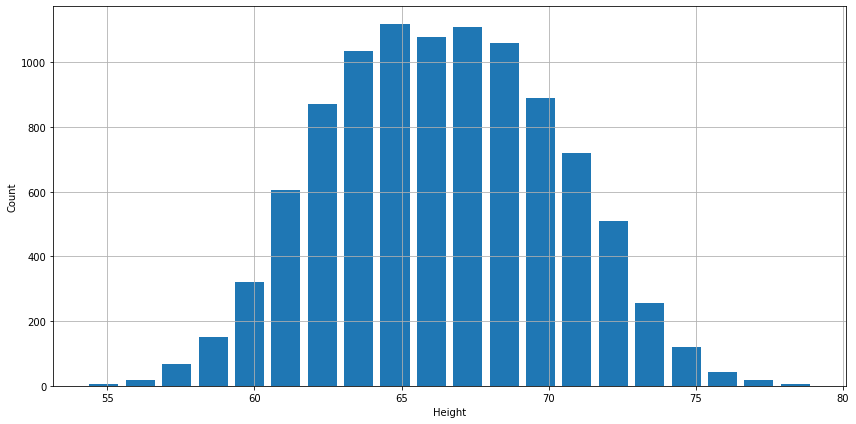

In [5]:
plt.figure(figsize=(12,6))
data.height.hist(bins=20,rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.tight_layout()

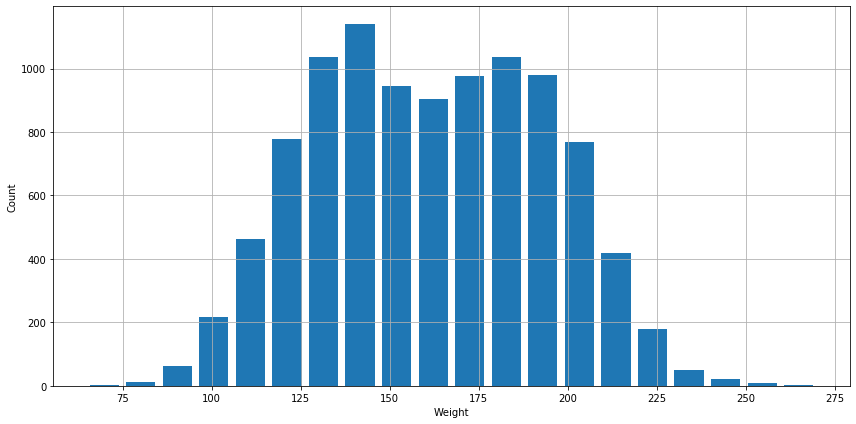

In [6]:
plt.figure(figsize=(12,6))
data.weight.hist(bins=20,rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()

### Detect Outliers based on Height

In [7]:
#Calculate Q1 and Q3
quartile1_height,quartile3_height=np.percentile(data['height'],[25,75])

In [8]:
print("Quartile1 for Height:",quartile1_height)
print("Quartile3 for Height:",quartile3_height)

Quartile1 for Height: 63.50562048
Quartile3 for Height: 69.1742617275


In [9]:
#Calculate Inter-Quartile Range
IQF_height=quartile3_height - quartile1_height
IQF_height

5.668641247499998

In [10]:
#Calculate Lower bound and upper bound
lower_bound_height=quartile1_height-(1.5*IQF_height) 
upper_bound_height=quartile3_height+(1.5*IQF_height)

In [11]:
print("Lower bound for Height:",lower_bound_height)
print("Upper bound for Height:",upper_bound_height)

Lower bound for Height: 55.00265860875
Upper bound for Height: 77.67722359874999


In [12]:
#Detect Outliers
data[(data['height']<lower_bound_height) | (data['height']>upper_bound_height)]

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


### Detect Outliers based on Weight

In [13]:
#Calculate Q1 and Q3
quartile1_weight,quartile3_weight=np.percentile(data['weight'],[25,75])

In [14]:
print("Quartile1 for Weight:",quartile1_weight)
print("Quartile3 for Weight:",quartile3_weight)

Quartile1 for Weight: 135.818051325
Quartile3 for Weight: 187.16952485000002


In [15]:
#Calculate Inter-Quartile Range
IQF_weight=quartile3_weight - quartile1_weight
IQF_weight

51.35147352500002

In [16]:
#Calculate Lower bound and upper bound
lower_bound_weight=quartile1_weight-(1.5*IQF_weight) 
upper_bound_weight=quartile3_weight+(1.5*IQF_weight)

In [17]:
print("Lower bound for Weight:",lower_bound_weight)
print("Upper bound for Weight:",upper_bound_weight)

Lower bound for Weight: 58.79084103749997
Upper bound for Weight: 264.1967351375


In [18]:
#Detect Outliers
data[(data['weight']<lower_bound_weight) | (data['weight']>upper_bound_weight)]

,gender,height,weight
2014,Male,78.998742,269.989698


### Remove Outliers

In [19]:
data_new= data[(data['height']>lower_bound_height) & (data['height']<upper_bound_height) & (data['weight']>lower_bound_weight) & (data['weight']<upper_bound_weight)]
data_new

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [20]:
print("Old dataset shape: ", data.shape)
print("New dataset shape after removing outliers using IQR: ",data_new.shape)

Old dataset shape:  (10000, 3)
New dataset shape after removing outliers using IQR:  (9992, 3)


<b>Conclusion:</b> IQR is an effective technique to detect outliers in data.

<b> References: </b> <br>
1. https://www.youtube.com/watch?v=A3gClkblXK8&t=9s
2. https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/